### 3.5.4 chap_3_first_classifier TF
### Practice Notebook
---
*by Pablo Bauer*


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)
positive_samples =  np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)


In [5]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [6]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), np.ones((num_samples_per_class, 1), dtype='float32')))

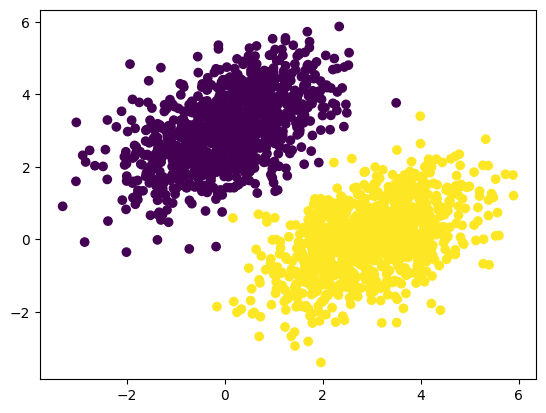

In [10]:
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])

In [12]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [13]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [14]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)

  return tf.reduce_mean(per_sample_losses)

In [16]:
learning_rate = 0.1

In [17]:
def training_steps(inputs,  targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)

  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss

In [18]:
for step in range(40):
  loss = training_steps(inputs, targets)
  print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 1.9041
Loss at step 1: 0.3345
Loss at step 2: 0.1481
Loss at step 3: 0.1151
Loss at step 4: 0.1042
Loss at step 5: 0.0970
Loss at step 6: 0.0908
Loss at step 7: 0.0851
Loss at step 8: 0.0800
Loss at step 9: 0.0752
Loss at step 10: 0.0709
Loss at step 11: 0.0670
Loss at step 12: 0.0634
Loss at step 13: 0.0601
Loss at step 14: 0.0571
Loss at step 15: 0.0544
Loss at step 16: 0.0519
Loss at step 17: 0.0496
Loss at step 18: 0.0475
Loss at step 19: 0.0455
Loss at step 20: 0.0438
Loss at step 21: 0.0422
Loss at step 22: 0.0407
Loss at step 23: 0.0394
Loss at step 24: 0.0382
Loss at step 25: 0.0371
Loss at step 26: 0.0360
Loss at step 27: 0.0351
Loss at step 28: 0.0342
Loss at step 29: 0.0335
Loss at step 30: 0.0327
Loss at step 31: 0.0321
Loss at step 32: 0.0315
Loss at step 33: 0.0310
Loss at step 34: 0.0305
Loss at step 35: 0.0300
Loss at step 36: 0.0296
Loss at step 37: 0.0292
Loss at step 38: 0.0289
Loss at step 39: 0.0285


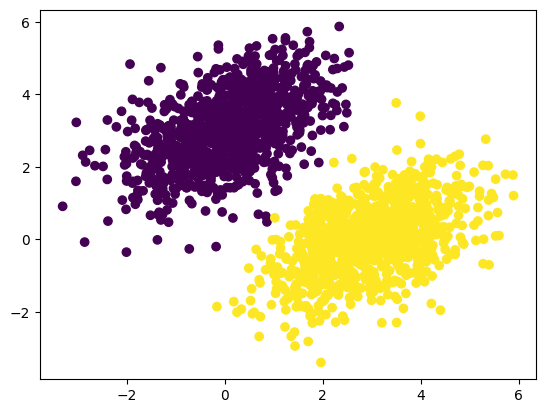

In [19]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0]>0.5)

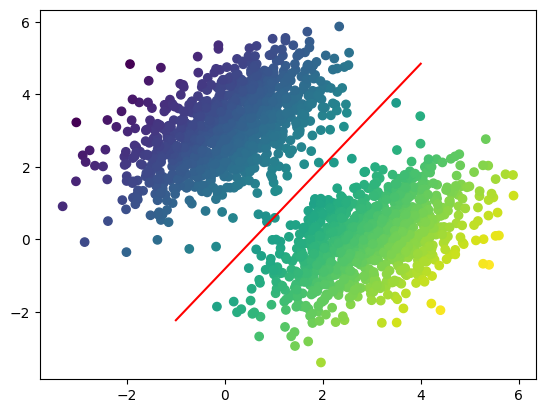

In [20]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0 > 0.5])